# K-means Clustering

### Import resources and display image

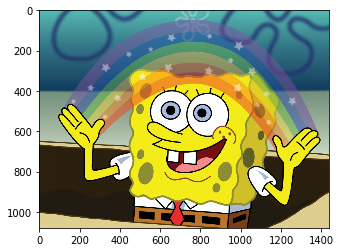

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
#image = cv2.imread('images/k-means-machine-learning.jpg')
image = cv2.imread('images/sponge_bob.png')


# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [2]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# Convert to float type
pixel_vals = np.float32(pixel_vals)

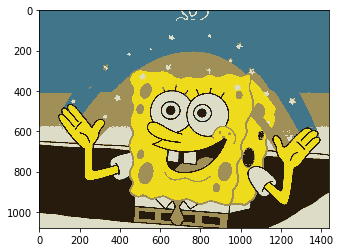

In [6]:
# define criteria, number of clusters(K) and apply kmeans()
# Entrada
Z = pixel_vals

# Criterio
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Numbero de clusters
K = 5


# Funcion
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# retval, bestLabels, centers	=	cv.kmeans(	data, K, bestLabels, criteria, attempts, flags[, centers]	)
# Parameters
# data	Data for clustering. An array of N-Dimensional points with float coordinates is needed.
# K	Number of clusters to split the set by.
# criteria	The algorithm termination criteria, that is, the maximum number of iterations 
# and/or the desired accuracy. The accuracy is specified as criteria.epsilon.
# As soon as each of the cluster centers moves by less than criteria.epsilon on some iteration, the algorithm stops.
# attempts	Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness (see the last function parameter).
# flags	Flag that can take values of cv::KmeansFlags
# centers	Output matrix of the cluster centers, one row per each cluster center.

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image.shape))


plt.imshow(res2)


### Implement k-means clustering

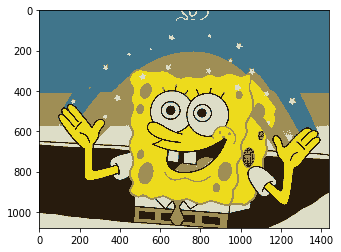

In [10]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)

## TODO: Select a value for k
# then perform k-means clustering
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

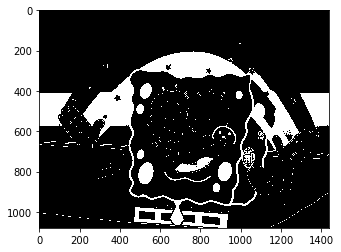

In [11]:
## Visualizar diferentes ca
plt.imshow(labels_reshape==1, cmap='gray')

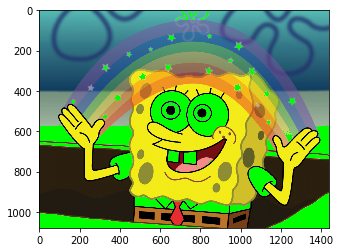

In [13]:
# mask an image segment by cluster

cluster = 2 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)